In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
house_data = pd.read_csv('house.csv')
house_data = house_data[house_data['loyer']< 10000]
house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


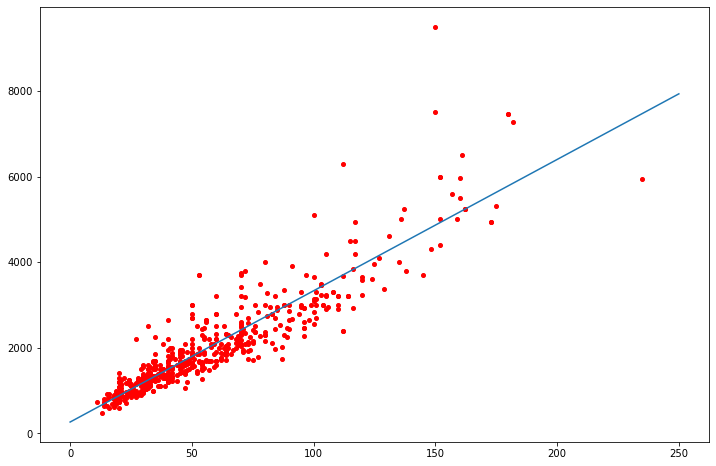

In [29]:
plt.figure(figsize=(12,8))
plt.plot(house_data['surface'], house_data['loyer'], 'ro',markersize=4)
plt.plot([0,250], [theta.item(0), theta.item(0) + 250 * theta.item(1)])
plt.show()

In [30]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface']]).T
y = np.matrix(house_data['loyer']).T

theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

matrix([[266.45460292],
        [ 30.66119596]])

In [32]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)


LinearRegression()

In [33]:
#KNN
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [34]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [37]:
sample = np.random.randint(7000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

In [39]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [41]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [42]:
knn.score(xtest,ytest)

0.941

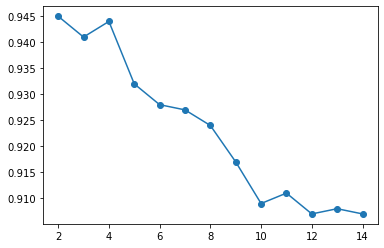

In [44]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(knn.fit(xtrain, ytrain).score(xtest, ytest))
plt.plot(range(2,15), errors, 'o-')
plt.show()

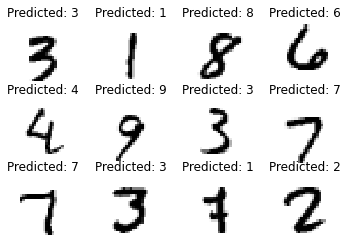

In [47]:
knn = neighbors.KNeighborsClassifier(2)
knn.fit(xtrain,ytrain)

predicted = knn.predict(xtest)

images = xtest.reshape((-1,28,28))

select = np.random.randint(images.shape[0], size=12)

fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

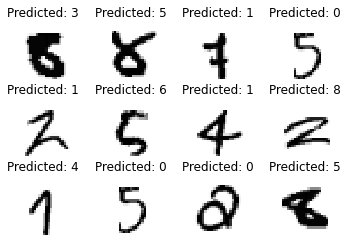

In [49]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()